### Dataset import etme

In [1]:
import os
for dirname, _, filenames in os.walk('./forest-cover-type-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./forest-cover-type-prediction/train (1).csv
./forest-cover-type-prediction/sampleSubmission.csv
./forest-cover-type-prediction/test.csv
./forest-cover-type-prediction/test3.csv
./forest-cover-type-prediction/test (1).csv
./forest-cover-type-prediction/sampleSubmission (1).csv
./forest-cover-type-prediction/project.ipynb
./forest-cover-type-prediction/train.csv
./forest-cover-type-prediction/.ipynb_checkpoints/project-checkpoint.ipynb


### Kütüphaneler import etme

In [2]:
import numpy as np 
import pandas as pd                    
import seaborn as sns      
import matplotlib
import matplotlib.pyplot as plt        
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

### Datayı çekme

In [3]:
train = pd.read_csv("./forest-cover-type-prediction/train.csv")
test = pd.read_csv("./forest-cover-type-prediction/test.csv")

In [4]:
train.info() # train dosyası bilgileri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

### Veriyi Görüntüleme

In [5]:
display(train.head())
display(test.head())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


### Train , Test satır ve sütun bilgileri

In [6]:
print("Train verisi satır ve sütunları (satır, sütun)",train.shape)
print("Test verisi satır ve sütunları (satır,sütun)",test.shape)

Train verisi satır ve sütunları (satır, sütun) (15120, 56)
Test verisi satır ve sütunları (satır,sütun) (565892, 55)


In [7]:
train.isnull().sum() #eksik değerlerin sayısını görüntüleme

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [8]:
numerical_features = train.select_dtypes(exclude='object') #sayısal özellikler
numerical_features

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


### Train verisindeki farklı sayılar

In [9]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature))) #farklı sayılar

Discrete Variables Count: 45


### Train verisinde tekrar eden sayılar

In [10]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Train_Type']]
print("Continuous feature Count {}".format(len(continuous_features))) #tekrar eden sayılar

Continuous feature Count 11


### Tekrar eden sayıların title ları

In [11]:
continuous_features #tekrar edenler

['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

### Train de tekrar eden sayıların dağılımı

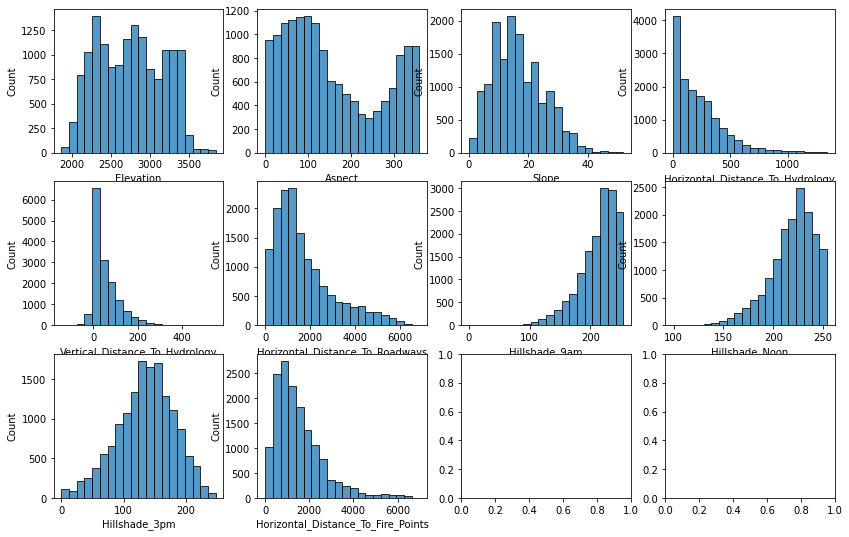

In [12]:
fig, ax = plt.subplots(3,4, figsize=(14,9))
sns.histplot(train.Elevation, bins = 20, ax=ax[0,0]) 
sns.histplot(train.Aspect, bins = 20, ax=ax[0,1]) 
sns.histplot(train.Slope, bins = 20, ax=ax[0,2]) 
sns.histplot(train.Horizontal_Distance_To_Hydrology, bins = 20, ax=ax[0,3])
sns.histplot(train.Vertical_Distance_To_Hydrology, bins = 20, ax=ax[1,0]) 
sns.histplot(train.Horizontal_Distance_To_Roadways, bins = 20, ax=ax[1,1]) 
sns.histplot(train.Hillshade_9am, bins = 20, ax=ax[1,2]) 
sns.histplot(train.Hillshade_Noon, bins = 20, ax=ax[1,3])
sns.histplot(train.Hillshade_3pm, bins = 20, ax=ax[2,0])
sns.histplot(train.Horizontal_Distance_To_Fire_Points, bins = 20, ax=ax[2,1])
plt.show()

### Train verisinde tüm titleların özellikleri için Histogram grafiği

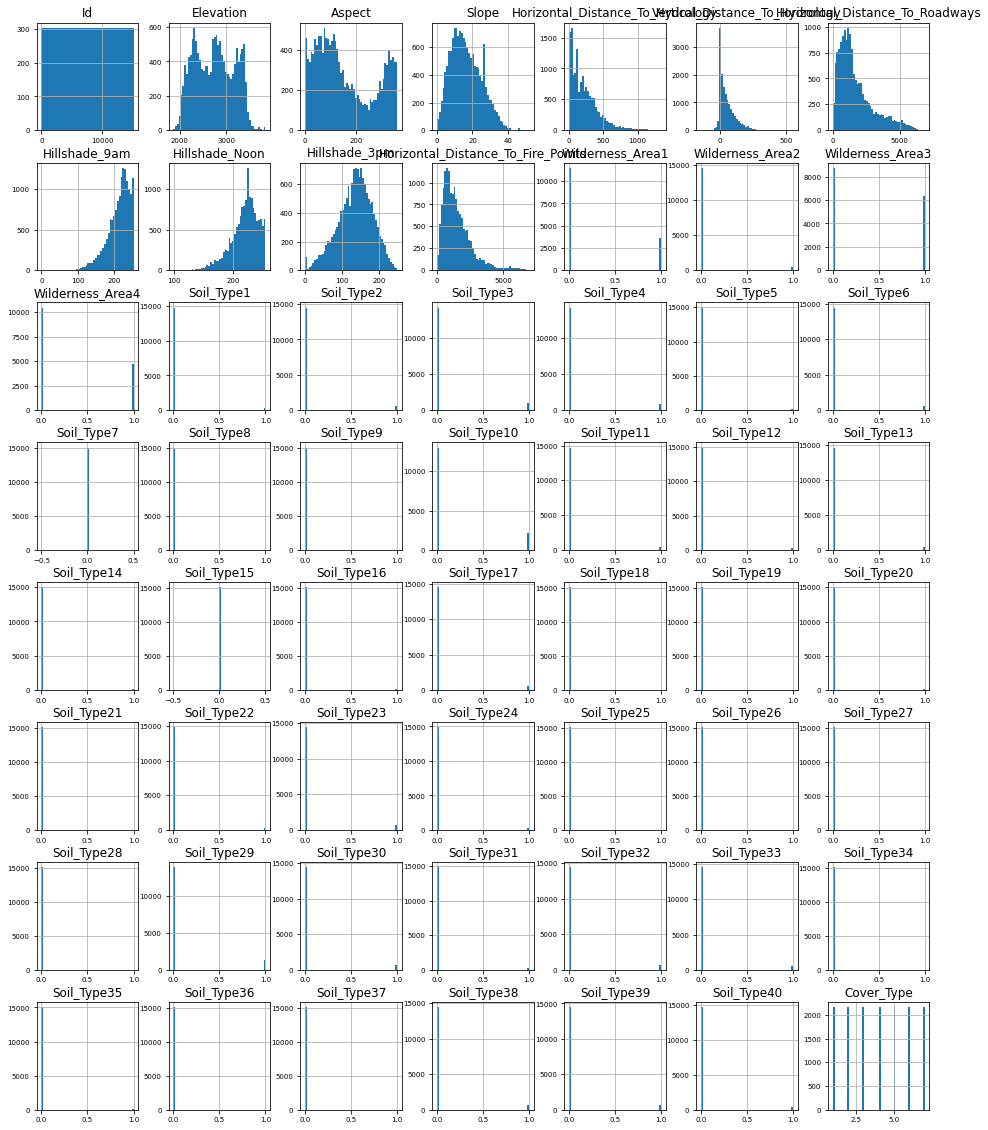

In [13]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=7, ylabelsize=7);


### Tekrar eden satır sayıları

In [14]:
print("train",sum(train.duplicated())) #yinelenen satır sayılarını kontrol etme
print("test",sum(train.duplicated()))

train 0
test 0


### Train verisindeki keşif verisini görselleştirme

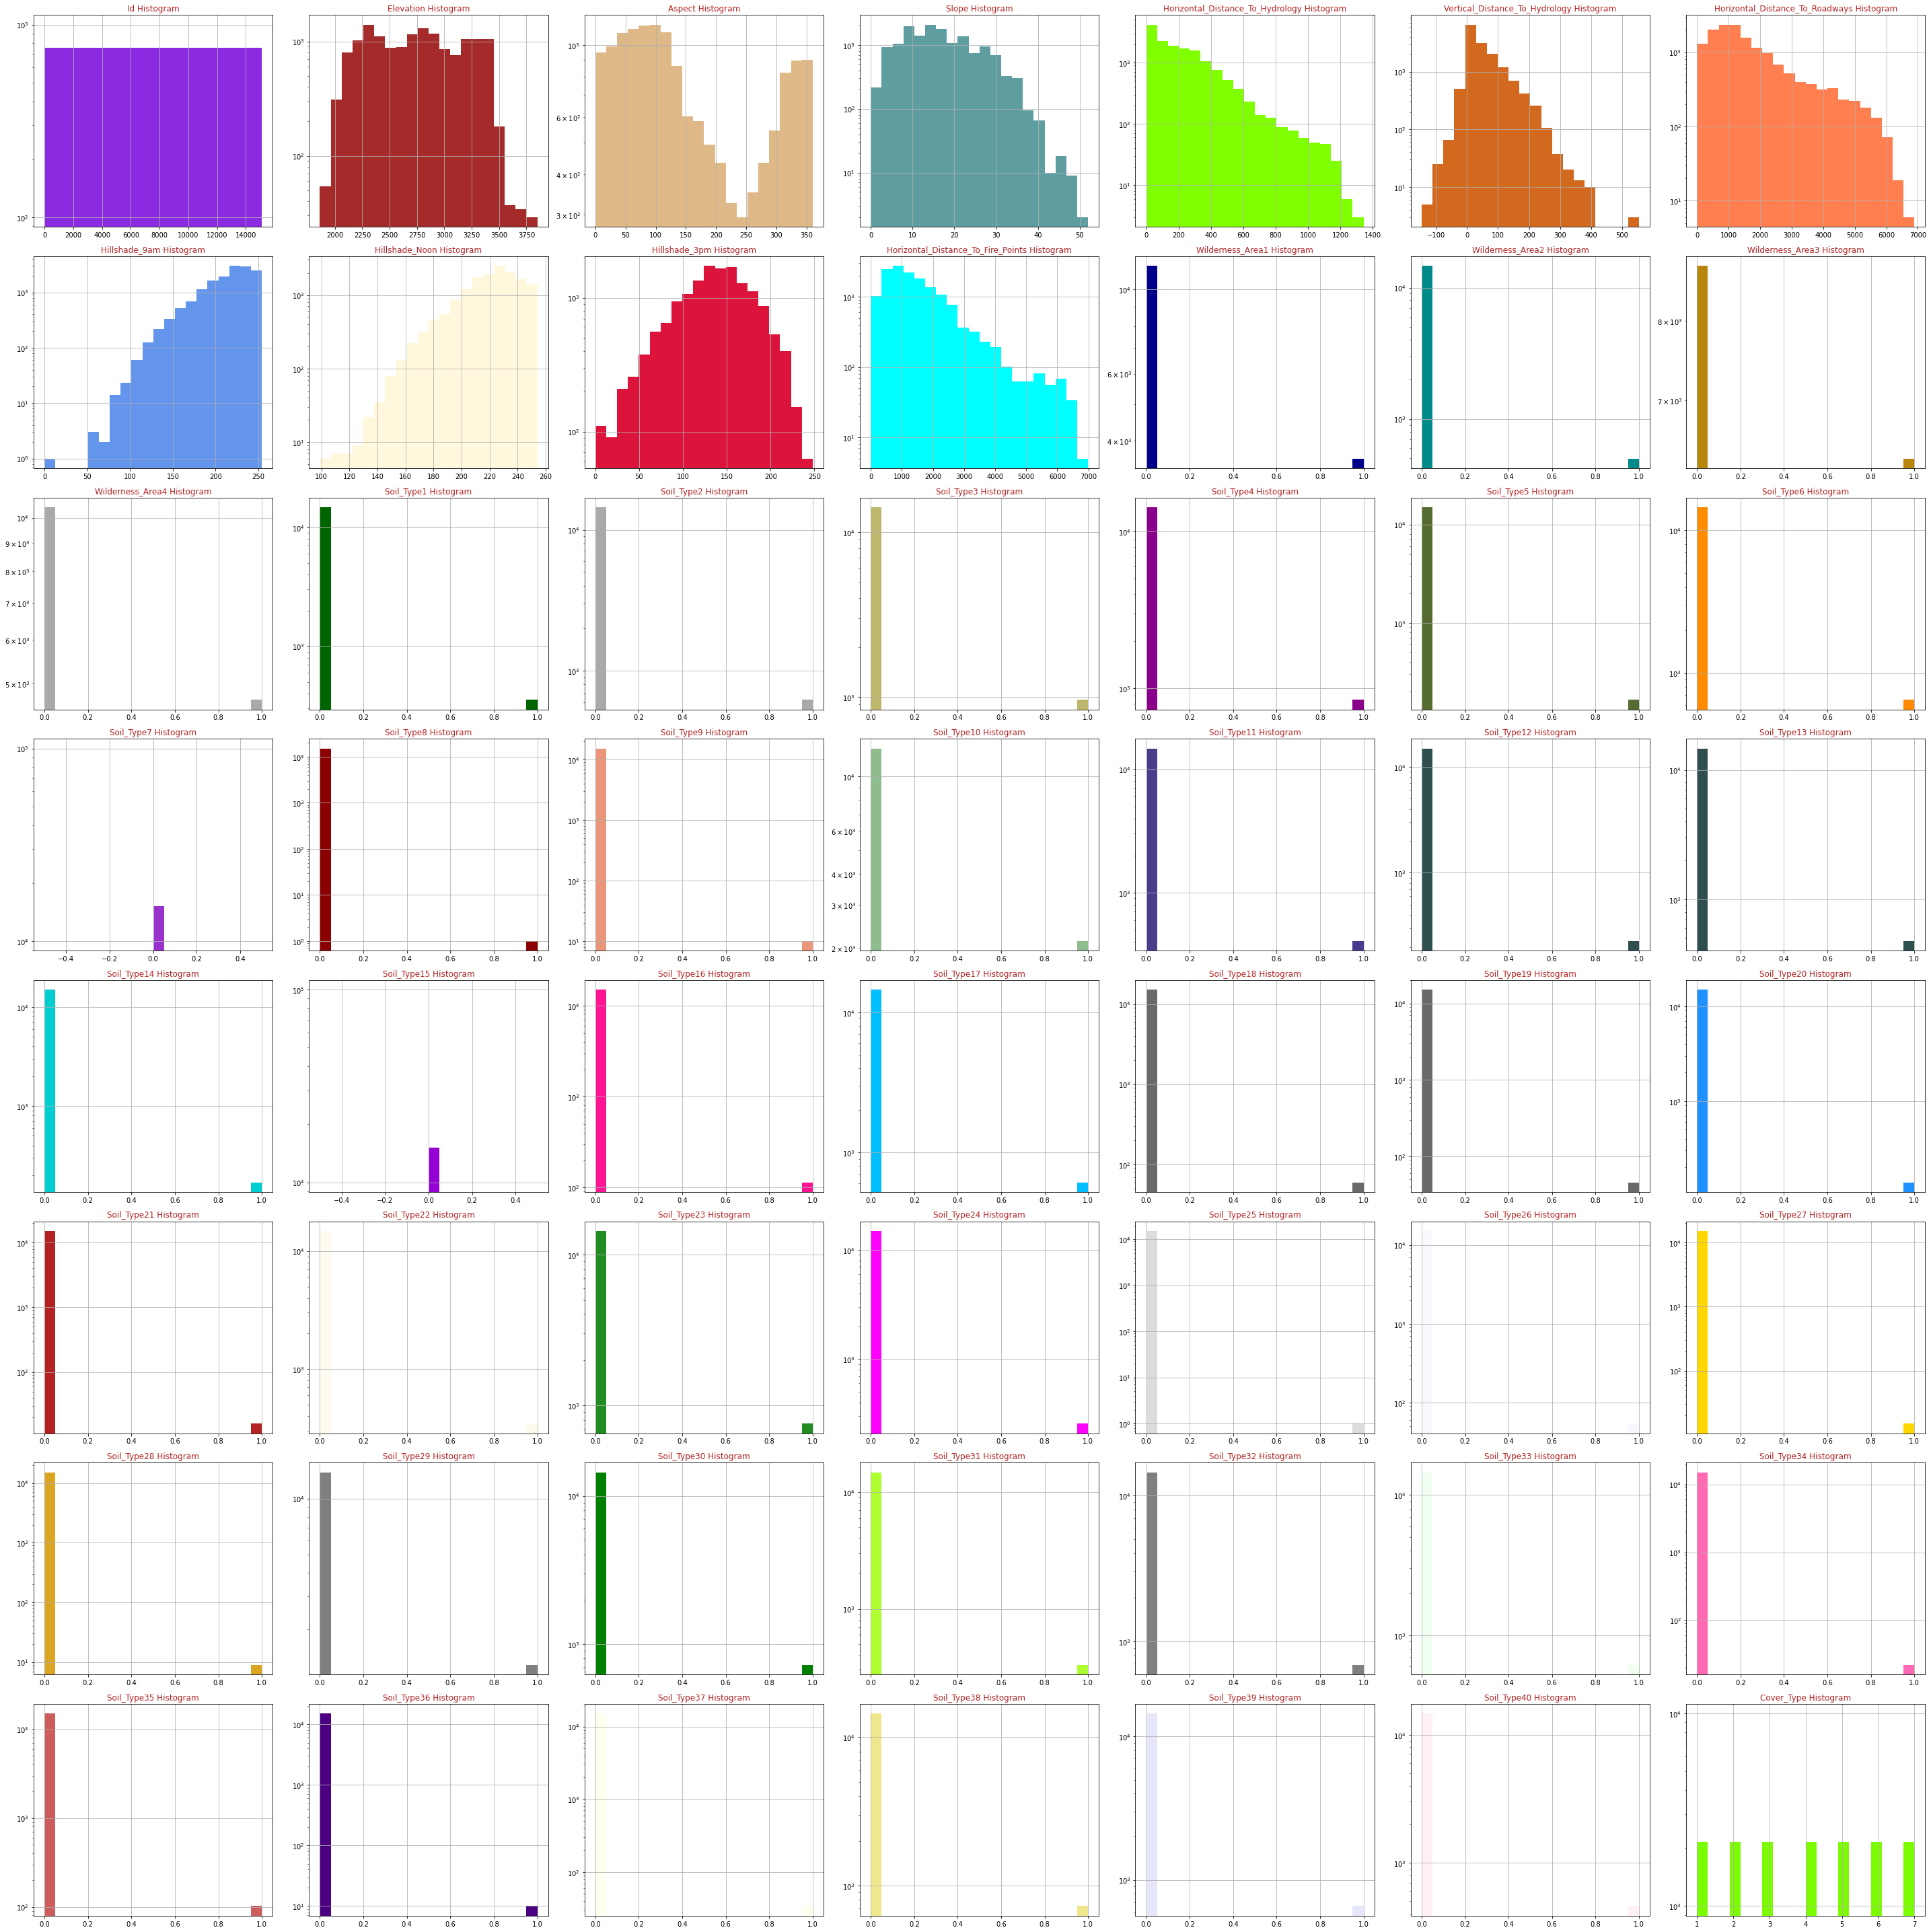

In [15]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(40,40))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(train,train.columns,8,7)

### Train verisinin ısı haritası

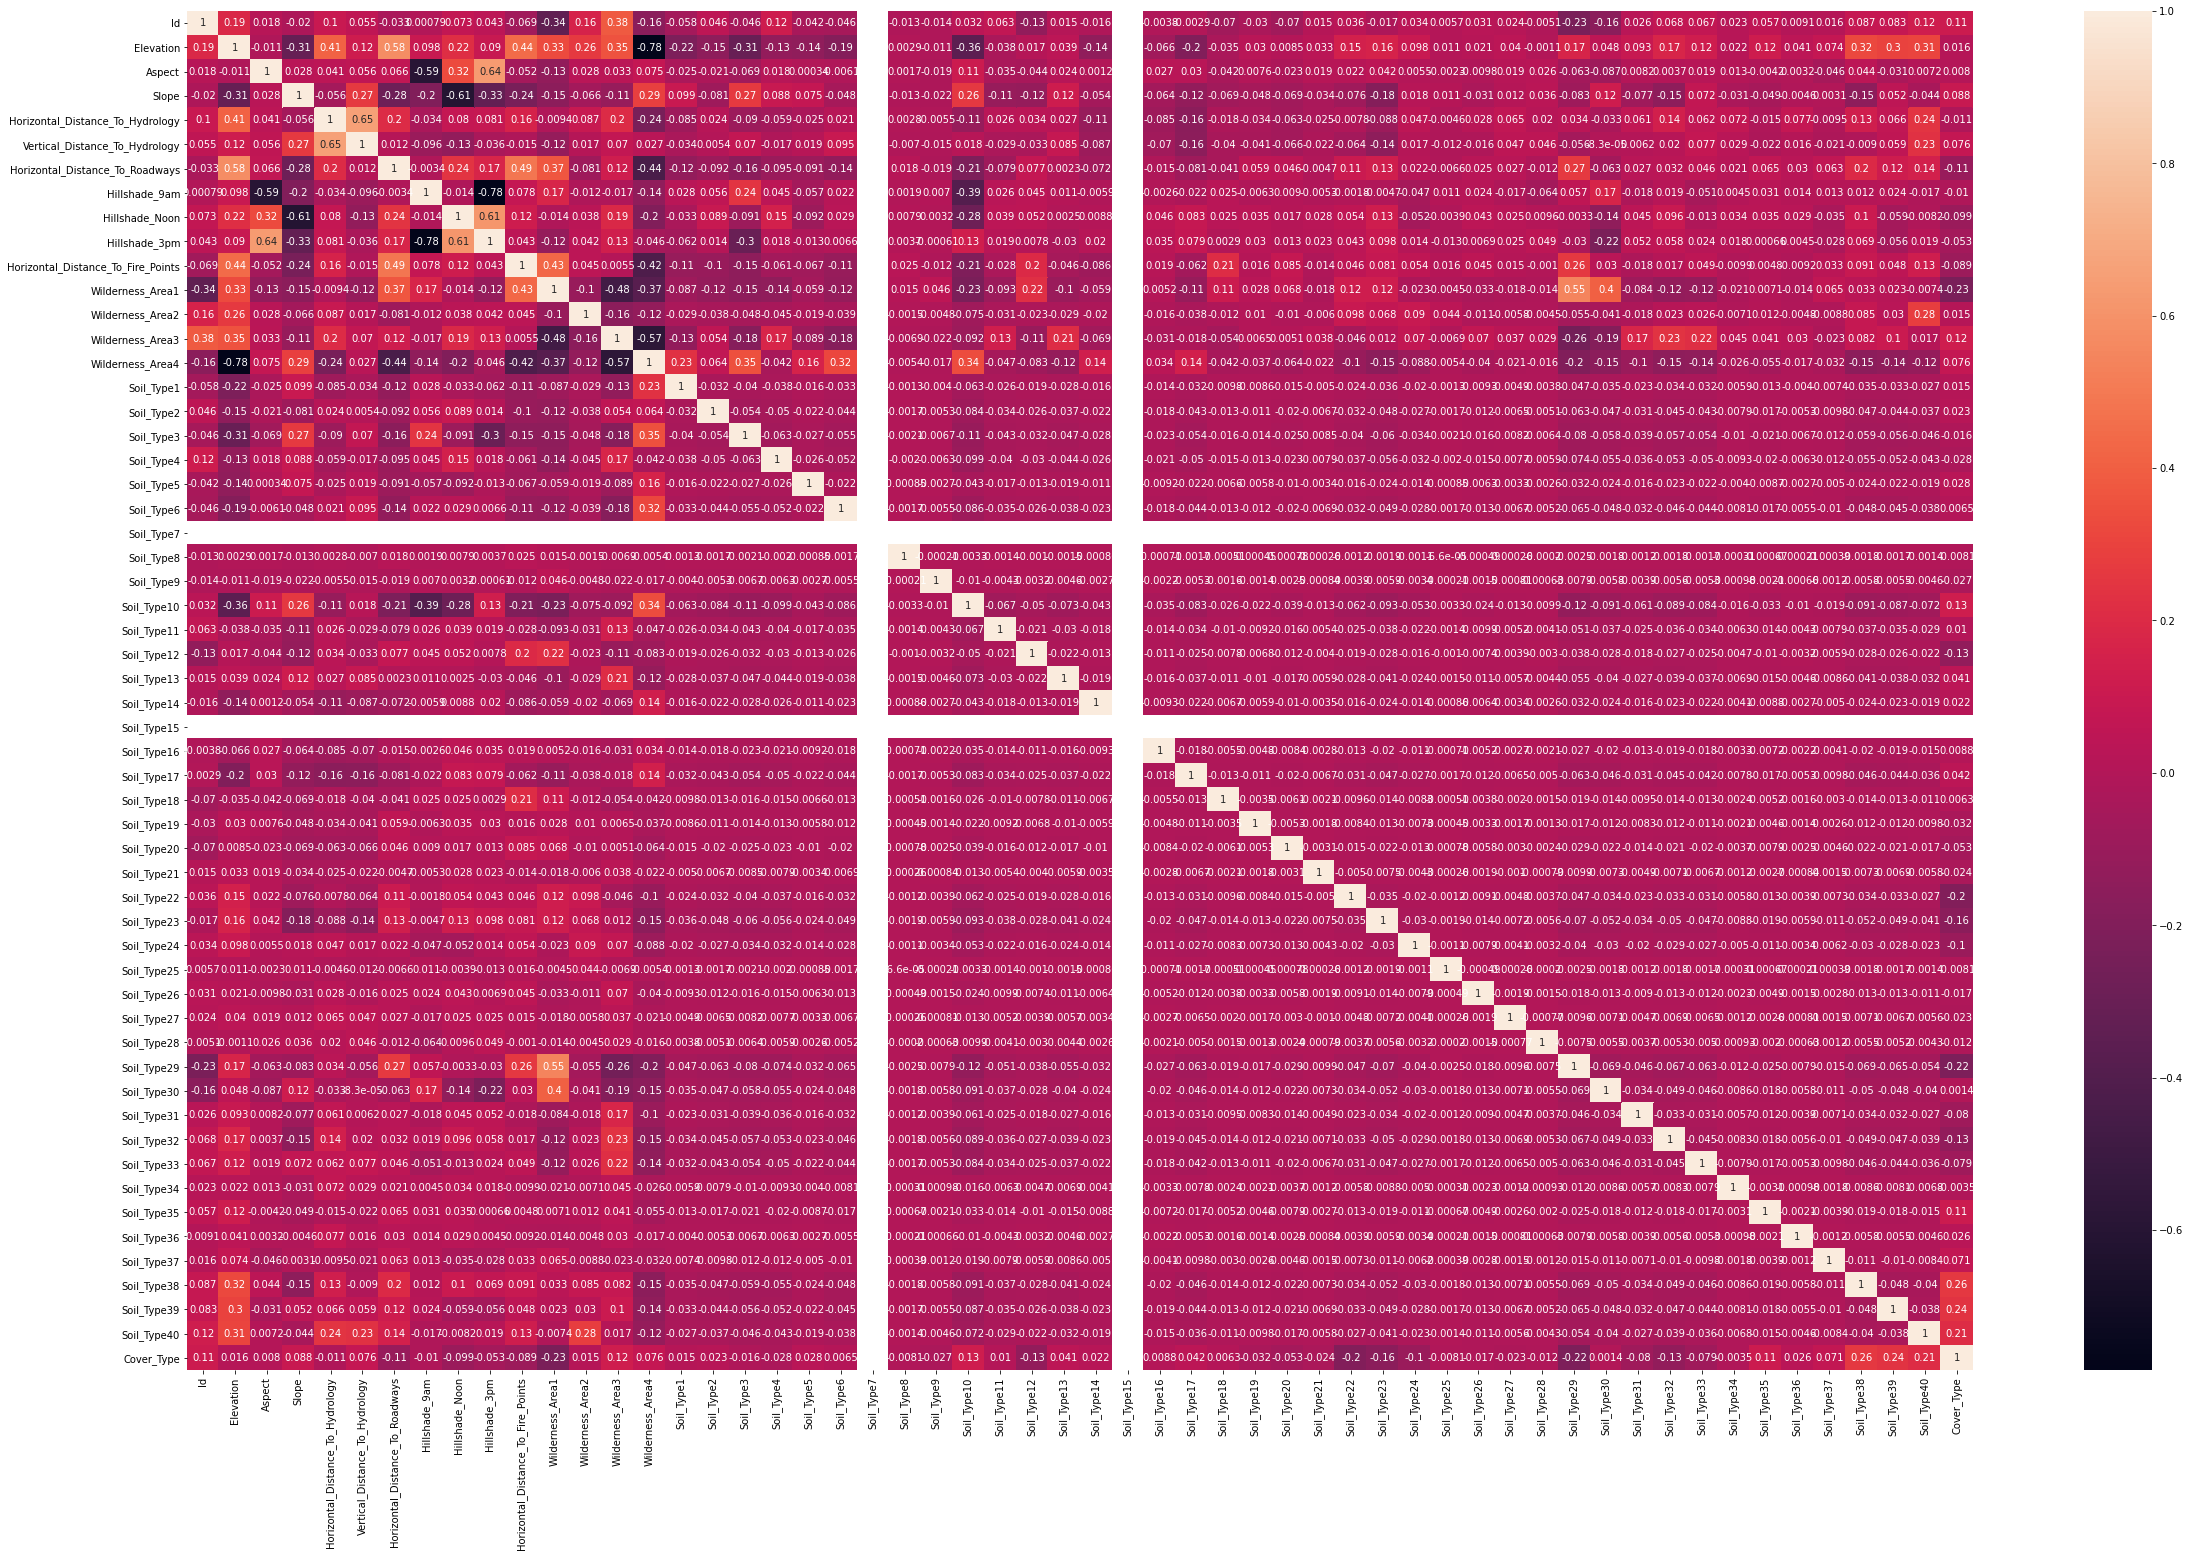

In [16]:
plt.figure(figsize = (40,25))
sns.heatmap(train.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

### Farklı toprak türleri değerlerinin kontrolü

In [17]:
for i in range(10, train.shape[1]-1):
    j = train.columns[i]
    print (train[j].value_counts())

618     65
541     51
636     45
607     43
573     42
        ..
6390     1
2300     1
2380     1
2139     1
6017     1
Name: Horizontal_Distance_To_Fire_Points, Length: 2710, dtype: int64
0    11523
1     3597
Name: Wilderness_Area1, dtype: int64
0    14621
1      499
Name: Wilderness_Area2, dtype: int64
0    8771
1    6349
Name: Wilderness_Area3, dtype: int64
0    10445
1     4675
Name: Wilderness_Area4, dtype: int64
0    14765
1      355
Name: Soil_Type1, dtype: int64
0    14497
1      623
Name: Soil_Type2, dtype: int64
0    14158
1      962
Name: Soil_Type3, dtype: int64
0    14277
1      843
Name: Soil_Type4, dtype: int64
0    14955
1      165
Name: Soil_Type5, dtype: int64
0    14470
1      650
Name: Soil_Type6, dtype: int64
0    15120
Name: Soil_Type7, dtype: int64
0    15119
1        1
Name: Soil_Type8, dtype: int64
0    15110
1       10
Name: Soil_Type9, dtype: int64
0    12978
1     2142
Name: Soil_Type10, dtype: int64
0    14714
1      406
Name: Soil_Type11, dtype: int64
0 

# Skewness (simetri) kontrolü

### Skewness bize bir dağılımdaki simetri hakkında bilgi verir.

### Skewness -0.5 ile +0.5 arasındaysa, verilerin oldukça simetrik olduğunu söyleyebiliriz.

### Skewness -1 ila -0.5 veya 0,5 ila 1 arasındaysa, veriler orta derecede simetriktir.

### Skewness -1'den küçük ve +1'den büyükse, verilerimiz simetrik değildir.

In [18]:
skew = train.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
print(skew)

Id                                      0.000000
Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6          

In [19]:
train.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

## Yukarıda
### Slope, Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology "0,5 ve 1 den büyük olduklarından sağa yaklaşıktır"
### Elevation,Hillshade_9am,Hillshade_Noon "0,5 ve -1 den küçük olduklarından sola yaklaşık"
#### ve diğerleri simetriktir

### ikili oldukları için "toprak tipi ve vahşi alan" dışındaki sütunları standart hale getirmek

### yabani ortam için aykırı değerleri hesaplama

In [20]:
def outlier_function(df, col_name):
    ''' bu işlev, bir veri çerçevesinin belirli bir sütunu için birinci ve üçüncü çeyrek ve çeyrekler arası aralığı algılar
    daha sonra aykırı değerleri ihtiyatlı bir şekilde belirlemek için üst ve alt limitleri hesaplar
    sırasıyla alt ve üst limit ve aykırı değerlerin sayısını döndürür
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [21]:
# aykırı değer olup olmadığını görmek için tüm sütunları görüntüleme
for column in train.columns:
    if outlier_function(train, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

In [22]:
train = train[(train['Horizontal_Distance_To_Fire_Points'] > outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train['Horizontal_Distance_To_Fire_Points'] < outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[1])]

In [23]:
train['Wilderness_Area_Type'] = (train.iloc[:, 11:15] == 1).idxmax(1)

In [24]:
def split_numbers_chars(row):
    '''Bu işlev, bir dizenin sonundaki sayısal karakterleri getirir.
    ve sırasıyla alfabetik karakter ve sayısal karakterler döndürür'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' bu işlev, bağımsız değişkenler olarak oluşturulacak bir sıcak kodlanmış sütun kümesinin ve sayısal sütun adının başlangıç ​​ve bitiş konumunu alır.
    1) bir sıcak kodlanmış sütunları, dize veri türüyle sütun adlarından oluşan bir sütuna dönüştürür
    2) string sütununu alfabetik ve sayısal karakterlere böler
    3) sayısal karakter getirir ve verilen veri çerçevesinde sayısal sütun oluşturur
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [25]:
continuous_variables = train.columns[1:11].tolist()
wilderness_areas = sorted(train['Wilderness_Area_Type'].value_counts().index.tolist())
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type40"] + ["Cover_Type"]
trees_w_numeric_soil = train[all_features_w_label]

In [26]:
trees_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 +                                
trees_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5

/tmp/ipykernel_1079432/3564253570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 +


In [27]:
trees_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_w_numeric_soil['Elevation'] +                                                               trees_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] +                   trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] +                                                   trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
trees_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] +                              trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2

/tmp/ipykernel_1079432/68942376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_w_numeric_soil['Elevation'] +                                                               trees_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
/tmp/ipykernel_1079432/68942376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology']

In [28]:
for col in trees_w_numeric_soil.columns:
    if trees_w_numeric_soil[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            trees_w_numeric_soil['sqrt' + col] = np.sqrt(trees_w_numeric_soil[col])

/tmp/ipykernel_1079432/399774765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_w_numeric_soil['sqrt' + col] = np.sqrt(trees_w_numeric_soil[col])


In [30]:
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints']
all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + 
wilderness_areas + ['Soil_Type40'] + transformed_features)
trees_training = trees_w_numeric_soil[all_features]
labels_training = trees_w_numeric_soil["Cover_Type"].to_numpy()


In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(trees_training, labels_training, test_size=0.2, random_state=1)

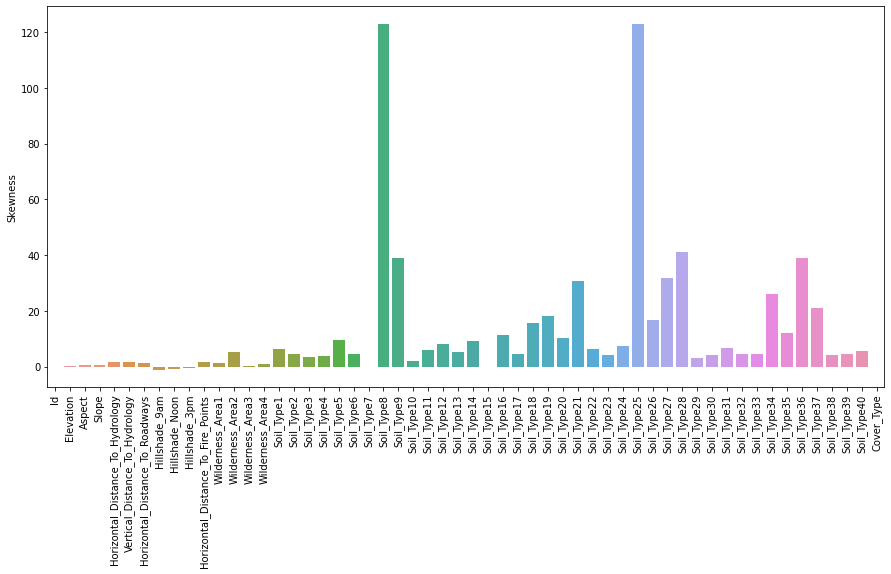

In [32]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
var = plt.xticks(rotation=90)

### Train verisinde bağımlı ve bağımsız değişkenleri tanımlama

In [ ]:
X = train.drop(columns='Cover_Type',axis=1)
y = train['Cover_Type']

In [ ]:
# Train ve Test setlerini 70/30 oranında ayırma , test boyutunun %20 sini seçildi
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [ ]:
# X & Y Test ve Trainin bilgileri
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11990, 56) (2998, 56) (11990,) (2998,)


In [ ]:
clf_accuracy=[]

In [ ]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [257]:
y_pred_LogReg = LogReg.predict(X_test)
clf_accuracy.append(accuracy_score(y_test, y_pred_LogReg))
print(accuracy_score(y_test, y_pred_LogReg))

0.12863756613756613


In [307]:
y_pred_tree = DecisionTreeClassifier.predict(X_test)
clf_accuracy.append(accuracy_score(y_test, y_pred_tree))
print(accuracy_score(y_test, y_pred_tree))

TypeError: predict() missing 1 required positional argument: 'X'

In [258]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LogReg.score(X_train, y_train), LogReg.score(X_test, y_test)))

Train Score 0.15 & Test Score 0.13


In [259]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Logistic Regression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_LogReg)),
            mean_squared_error(y_test, y_pred_LogReg),
            mean_absolute_error(y_test, y_pred_LogReg),
            r2_score(y_test, y_pred_LogReg)))


Model			 RMSE 		 MSE 		 MAE 		 R2
Logistic Regression 	 3.64 		 13.23 		3.05 		-2.38


In [217]:
train_acc = LogReg.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 71.27149470899471


In [219]:
X_test_scaled = scaler.transform(X_test)
y_pred=LogReg.predict(X_test_scaled)

In [220]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 70.1058201058201


In [221]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.67      0.66      0.66       439
           2       0.62      0.54      0.58       439
           3       0.64      0.53      0.58       441
           4       0.79      0.88      0.83       443
           5       0.73      0.79      0.76       436
           6       0.59      0.66      0.62       437
           7       0.87      0.88      0.87       389

    accuracy                           0.70      3024
   macro avg       0.70      0.70      0.70      3024
weighted avg       0.70      0.70      0.70      3024



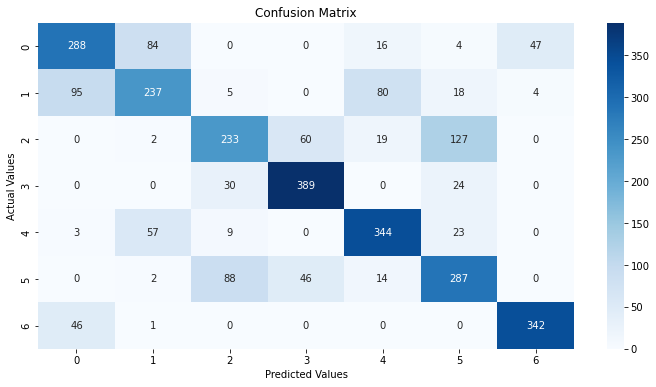

In [222]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [301]:
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])